# Regresión Linear Simple

## 1. Importar Librerias

In [80]:
import numpy as np
import pandas as pd

# Generación de Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Explorar datos, estimar modelos estadísticos y realizar pruebas estadísticas
import statsmodels.api as sm
import statsmodels.stats.api as sms

# Optimización y métodos numéricos
from scipy import stats
from scipy.stats import norm

# Aprendizaje automático
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## 2. Cargar base de datos
###  Pollution data

In [60]:
data_url = "https://lib.stat.cmu.edu/datasets/pollution"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :6]])

# This is the pollution data so loved by writers of papers on ridge regression.
# Source: McDonald, G.C. and Schwing, R.C. (1973) 'Instabilities of regression
# estimates relating air pollution to mortality', Technometrics, vol.15, 463-
# 482.
# Variables in order:
# PREC   Average annual precipitation in inches
# JANT   Average January temperature in degrees F
# JULT   Same for July
# OVR65  % of 1960 SMSA population aged 65 or older
# POPN   Average household size
# EDUC   Median school years completed by those over 22
# HOUS   % of housing units which are sound & with all facilities
# DENS   Population per sq. mile in urbanized areas, 1960
# NONW   % non-white population in urbanized areas, 1960
# WWDRK  % employed in white collar occupations
# POOR   % of families with income < $3000
# HC     Relative hydrocarbon pollution potential
# NOX    Same for nitric oxides
# SO@    Same for sulphur dioxide
# HUMID  Annual average % relative humidity at 1pm
# MORT   Total age-adjusted mortality rate per 100,000

## 3. Analisis de la matriz de correlación

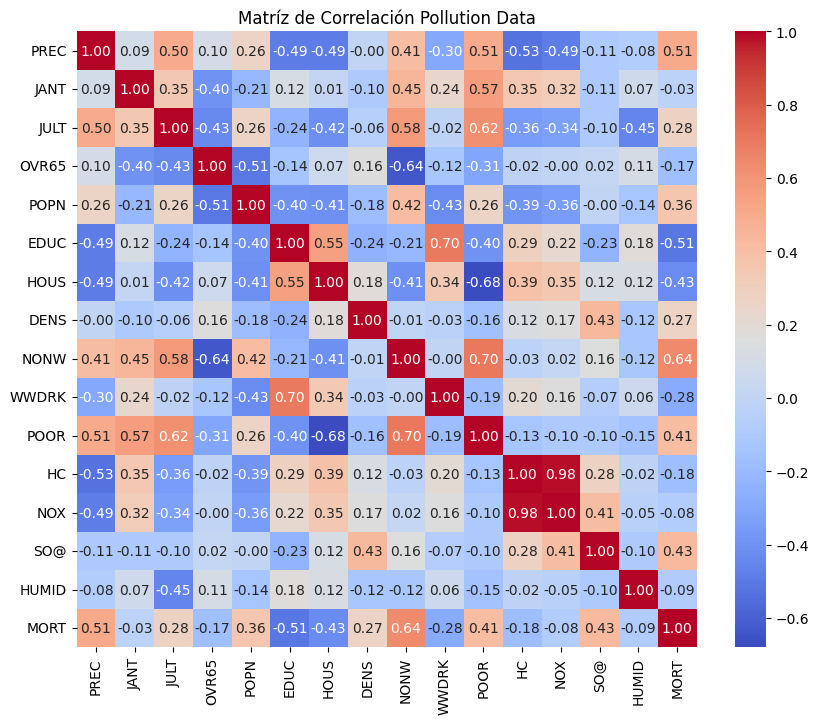

In [61]:
column_names = [
    'PREC', 'JANT', 'JULT', 'OVR65', 
    'POPN', 'EDUC', 'HOUS', 'DENS', 
    'NONW', 'WWDRK', 'POOR', 'HC', 
    'NOX', 'SO@', 'HUMID', 'MORT'
]
df = pd.DataFrame(data, columns=column_names)

correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title("Matríz de Correlación Pollution Data")
plt.show()

## 4. Seleccion de Variables

In [70]:
# Variable Independiente NONW
X = data[:, np.newaxis,8]
# Variable Dependiente MORT
Y = data[:, np.newaxis,15]

## 5. Dividir los datos en conjunto de entrenamiento y prueba

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
random_state=42)

## 6. Modelo de Regresión Lineal sklearn

In [72]:
rls = linear_model.LinearRegression()
modelo = rls.fit(X_train, Y_train)

# Predicciones para los datos de entrenamiento
Y_pred_train=rls.predict(X_train)

#Predicciones para los datos de prueba
Y_pred=rls.predict(X_test)

# 7. Datos de la Regresión Lineal

In [74]:

print("Coeficientes:", rls.coef_)
print("Intercepto:", rls.intercept_)

Coeficientes: [[3.77018626]]
Intercepto: [898.47093836]




## 8. Parámetros para prueba de hipótesis B1 y B1

In [75]:
error = Y_train - Y_pred_train
ds_error = error.std()
ds_X = X_train.std()
error_st = ds_error / np.sqrt(404)
t1 = rls.coef_ / (error_st / ds_X)
print(t1)

media_X = X_train.mean()
media_XC = pow(media_X,2)
var_X = X_train.var()
t0 = rls.intercept_ / (error_st * np.sqrt(1 + (media_XC / var_X)))
print(t0)

[[12.92053635]]
[222.50764669]


## 9. Modelo de Regresión Lineal (statsmodel)

In [76]:
# Agregar una constante pare el término independiente (B9)
X_train = sm.add_constant(X_train)

# Crear un modelo de regresión lineal con los datos de entrenamiento
modelo = sm.OLS(Y_train, X_train).fit()

# Resumen estadístico
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     19.01
Date:                Sat, 02 Nov 2024   Prob (F-statistic):           7.26e-05
Time:                        20:31:46   Log-Likelihood:                -251.85
No. Observations:                  48   AIC:                             507.7
Df Residuals:                      46   BIC:                             511.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        898.4709     11.967     75.082      0.0

## 10. Métricas de Evaluación del modelo datos de prueba

In [81]:
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("\n**Evaluación del modelo de regresión lineal **")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")



**Evaluación del modelo de regresión lineal **
RMSE: 54.135352395713916
MAE: 39.546775823288364
R²: 0.5845537511164316
